In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import torchvision.utils as vutils
from torch.utils.data import WeightedRandomSampler, DataLoader, Dataset

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

import seaborn as sns
from scipy import ndimage

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('running on:', device)

running on: cuda:0


In [4]:
kirsch_compass_masks = [
    np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]]),   # north
    np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]]),   # north-east
    np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]]),   # east
    np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]]),   # south-east
    # np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]]),   # south
    # np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]]),   # south-west 
    # np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]]),   # west
    # np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]]),   # north-west
]

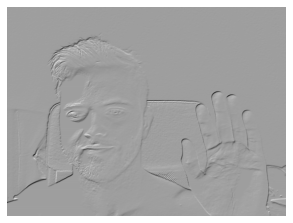

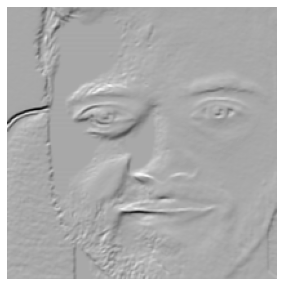

In [25]:
transform = transforms.Compose([
    transforms.ToTensor()
])



def filter_image(image):
    filter = kirsch_compass_masks
    image = image.squeeze(0) 

    image_filtered = np.zeros_like(image)
    for cm in filter:
        k = ndimage.convolve(image, cm, mode='nearest', cval=0.0)
        image_filtered = np.add(image_filtered, k)

    image_filtered = transform(image_filtered)

    plt.figure(figsize=(5,5))
    plt.axis('off'); plt.title('')
    plt.imshow(image_filtered.permute(1,2,0), cmap='gray')
    plt.show()

    return image_filtered




image = Image.open('data/douglas.png')
image = image.convert('L')
image = transform(image)

image_filtered = filter_image(image)


image = Image.open('data/douglas2.png')
image = image.convert('L')
image = transform(image)

image_filtered = filter_image(image)